In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
from sklearn.metrics import mean_squared_error

2024-06-09 19:51:58.809767: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-09 19:51:59.483300: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-09 19:52:06.949925: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
data = yf.download('^RUT', start='2005-01-01', end='2024-06-04')

# Use only the 'Close' price
data = data[['Close']]
data

[*********************100%%**********************]  1 of 1 completed


,Close
Date,
2005-01-03,640.440002
2005-01-04,628.539978
2005-01-05,617.479980
2005-01-06,619.820007
2005-01-07,613.210022
...,...
2024-05-28,2066.850098
2024-05-29,2036.189941
2024-05-30,2056.600098


In [5]:
# Feature Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)
display(scaled_data)

array([[0.14154933],
       [0.13588125],
       [0.13061328],
       ...,
       [0.81607832],
       [0.82252267],
       [0.81754527]])

In [ ]:
# Create sequences for training
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

In [6]:
# Define sequence length
seq_length = 60

# Create sequences
X, y = create_sequences(scaled_data, seq_length)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [7]:
# Build the GRU model
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(GRU(units=50))
model.add(Dense(1))


2024-06-09 19:55:25.657573: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-09 19:55:25.661456: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-09 19:55:25.664614: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Make predictions
predicted_prices = model.predict(X_test)

Epoch 1/20


2024-06-09 19:55:50.506116: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-09 19:55:50.509891: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-09 19:55:50.513027: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

109/109 [==============================] - ETA: 0s - loss: 0.0043

2024-06-09 19:56:05.611429: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-09 19:56:05.617277: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-09 19:56:05.620131: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

109/109 [==============================] - 17s 91ms/step - loss: 0.0043 - val_loss: 3.7834e-04
Epoch 2/20
109/109 [==============================] - 8s 73ms/step - loss: 6.8069e-05 - val_loss: 3.4674e-04
Epoch 3/20
109/109 [==============================] - 8s 72ms/step - loss: 6.6797e-05 - val_loss: 3.2038e-04
Epoch 4/20
109/109 [==============================] - 8s 73ms/step - loss: 6.0078e-05 - val_loss: 2.9326e-04
Epoch 5/20
109/109 [==============================] - 8s 73ms/step - loss: 5.9456e-05 - val_loss: 2.7505e-04
Epoch 6/20
109/109 [==============================] - 8s 72ms/step - loss: 5.3756e-05 - val_loss: 2.5652e-04
Epoch 7/20
109/109 [==============================] - 8s 69ms/step - loss: 5.4084e-05 - val_loss: 2.8829e-04
Epoch 8/20
109/109 [==============================] - 8s 72ms/step - loss: 5.1570e-05 - val_loss: 2.4217e-04
Epoch 9/20
109/109 [==============================] - 8s 71ms/step - loss: 4.6884e-05 - val_loss: 2.2157e-04
Epoch 10/20
109/109 [============

2024-06-09 19:58:36.307432: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-09 19:58:36.310277: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-09 19:58:36.313642: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

31/31 [==============================] - 2s 23ms/step


In [9]:
# Inverse transform the predictions
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [10]:
# Evaluate the model
mse = mean_squared_error(actual_prices, predicted_prices)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 817.0207360654638


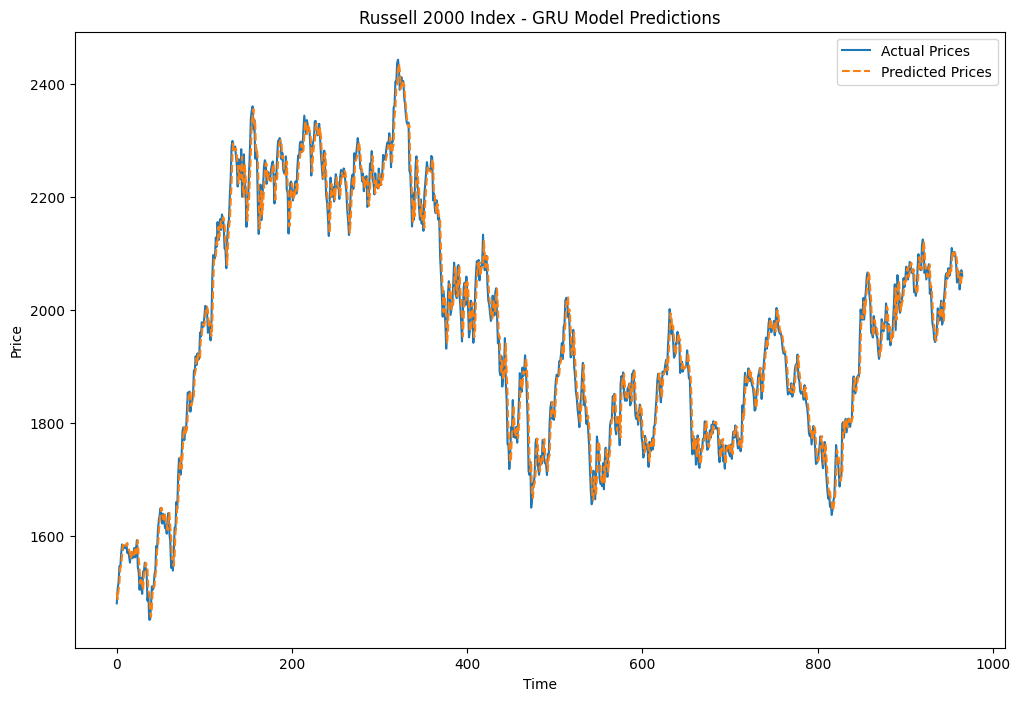

In [11]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices', linestyle='--')
plt.title('Russell 2000 Index - GRU Model Predictions')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [16]:
display(actual_prices[-5:].T)
display(predicted_prices[-5:].T)

array([[2066.85009766, 2036.18994141, 2056.60009766, 2070.12988281,
        2059.67993164]])

array([[2065.7964, 2067.033 , 2042.9331, 2053.111 , 2067.062 ]],
      dtype=float32)

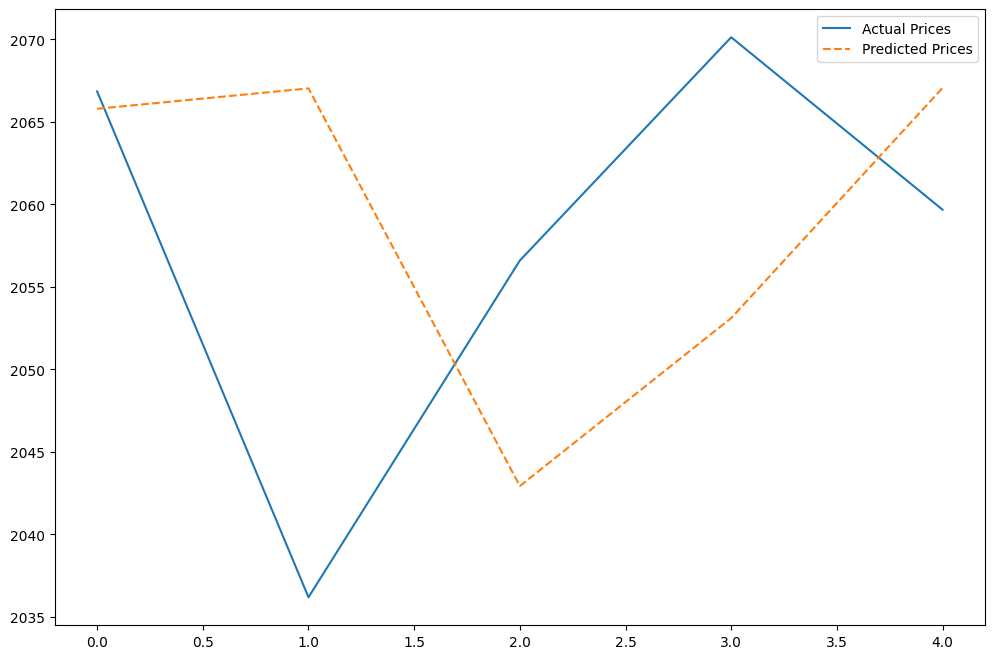

In [17]:
plt.figure(figsize=(12, 8))
plt.plot(actual_prices[-5:], label='Actual Prices')
plt.plot(predicted_prices[-5:], label='Predicted Prices', linestyle='--')
plt.legend()
plt.show()

In [18]:
# Predict the next 5 days
last_sequence = scaled_data[-seq_length:]
last_sequence = last_sequence.reshape((1, seq_length, 1))
next_5_days_scaled = model.predict(last_sequence)
next_5_days = scaler.inverse_transform(next_5_days_scaled)

print(f'Next 5 days predictions: {next_5_days}')

1/1 [==============================] - 0s 53ms/step
Next 5 days predictions: [[2061.9338]]
1/1 [==============================] - 0s 53ms/step
Next 5 days predictions: [[2061.9338]]
